## Fourier Transforms Example: Light Switch

Suppose we turn a light switch at $t=t_0-\tau/2$, and turn it off at $t=t_0+\tau/2$. We treat $\tau$ and $t_0$ as constant parameters. The light emitted during this interval has average frequency $\nu_0$, also a constant parameter.

The electric field (complex number!) emitted is:
$$E = E_0\text e^{-2 i\pi \nu_0 t}\quad \text{if}\quad t_0 - \frac\tau2\leq t\leq t_0 + \frac\tau2,\qquad E = 0\quad\text{otherwise}.$$

Apply the Fourier Transform formula to get the field in "frequency space", i.e. as a function of frequency $\nu$ rather than time $t$.
$$\hat E = \int_{t_0-\tau/2}^{t_0+\tau/2} E(t)\text e^{2\pi i (\nu-\nu_0) t} \text d \nu = E_0\tau \text e^{2\pi i (\nu-\nu_0) t_0}\underbrace{\frac{\sin\left[\pi(\nu-\nu_0)\tau\right]}{\pi(\nu-\nu_0)\tau}}_{=\text{sinc}\left[(\nu-\nu_0)\tau\right]},$$
where $\text{sinc}$ is called the Cardinal sine function.

Let's use parameters: $\tau = 1s,~t_0 = 10s,~\nu_0=5$ Hz

### Exercise 1

Calculate and plot the mormalized real part of the field, $Re(E) / E_0$, from $t_0 - \frac\tau2\leq t\leq t_0 + \frac\tau2$. Hint: when discretizing time, try using 4096 values.

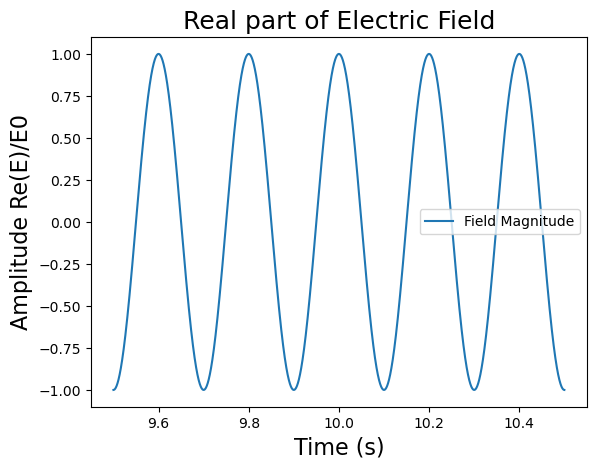

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def E(x, nu0):
    return np.exp(-2*1j*np.pi*nu0*x)

t0 = 10 #s
tau = 1 #s
nu0 = 5 #(1/s)

N = 4096
time = np.linspace(t0 - tau/2, t0 + tau/2, N)
field_ev = E(time, nu0)

# freq_vals = np.fft.fftfreq(N)
# fieldFT = np.fft.fft(field_ev)

# plt.plot(freq_vals, fieldFT.real)
# plt.show()



plt.plot(time, field_ev.real, label='Relative Field Magnitude')
plt.legend(loc='best')
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Amplitude Re(E)/E0', fontsize=16)
plt.title('Real part of Electric Field', fontsize=18)
plt.show()





### Exercise 2

Now calculate, using the formula given (not using a packaged routine), the Fourier transform of the signal, i.e. $\hat{E}(\nu)$, for $0 \leq \nu \leq \nu_0$. Make two plots: $Re(\hat{E}) / (E_0 \tau)$ as a function of $\nu$, and $|\hat{E}| / (E_0 \tau) $ as a function of $\nu$. The second plot, which shows normalized amplitudes, is called the spectrum of the signal.

Note:
* Spectrum is centred around $\nu=\nu_0$, but non-negligible width (i.e. not all the light has frequency exactly $\nu_0$.) So the plane wave approximation doesn't exactly hold.
* If you increase duration or increase frequency: spectrum is narrower around $\nu=\nu_0$, and you have a better plane wave approximation.
* If you shorten duration or decrease frequency (e.g. pulsed laser): the frequency spreads out. (See https://www.nobelprize.org/prizes/physics/2023/press-release/ , Nobel Prize for attosecond lasers)
* Bandwidth theorem:
    $$\tau\Delta\nu \approx 1$$
    *You may recognize something like Heisenberg's uncertainty principle!*


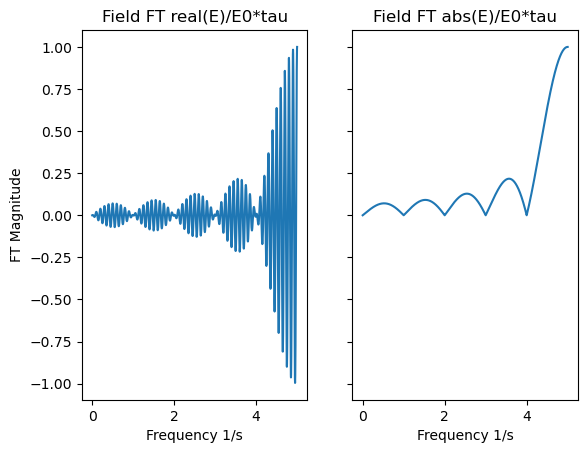

In [9]:
def fieldFT(nu, nu0, t0, tau):
    return tau*np.exp(2*np.pi*1j*(nu-nu0)*t0)*np.sinc((nu-nu0)*tau)

nu_axis = np.linspace(0, nu0, N)
FT_manual = fieldFT(nu_axis, nu0, t0, tau)


fig, (ax1, ax2) = plt.subplots(1,2, sharey = True)
ax1.plot(nu_axis, FT_manual.real/tau)
ax1.set_xlabel("Frequency 1/s")
ax1.set_ylabel("FT Magnitude")
ax1.set_title('Field FT real(E)/E0*tau')
ax2.plot(nu_axis, np.abs(FT_manual)/tau)
ax2.set_xlabel("Frequency 1/s")
ax2.set_title('Field FT abs(E)/E0*tau')


plt.show()


## DFT Example: Pitch (Sound) Timeseries

Adapted from textbook's online material.

### Exercise 3

Using numpy.loadtxt, read in the text file "pitch.txt" provided. The values are floats. 

The file represents a "time series" of samples of the pitch of a sound wave, i.e. the next value in the series represents the pitch at the next sample. The samples are taken at a frequency of 44100 Hz.

Make a plot of pitch (arbitrary units) vs time.

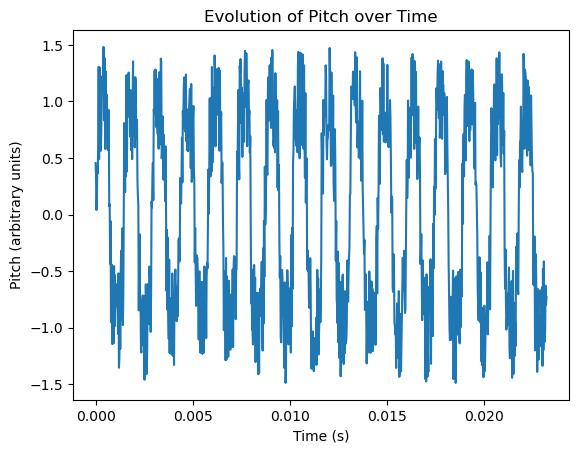

In [64]:
pitch = np.loadtxt('pitch.txt', unpack = True)

interval = 1/44100
N = len(pitch)
ptime = np.arange(0, N*interval, interval)

plt.plot(ptime, pitch)
plt.xlabel('Time (s)')
plt.ylabel('Pitch (arbitrary units)')
plt.title('Evolution of Pitch over Time')
plt.show()



### Exercise 4

Perform a Discrete Fourier Transform on the time series (the following code snippet from the textbook will help you). Using time.time, measure how long the transform takes. 

Plot the amplitudes (i.e. magnitudes) of the Fourier coefficients.

time to compute =  1.643394947052002


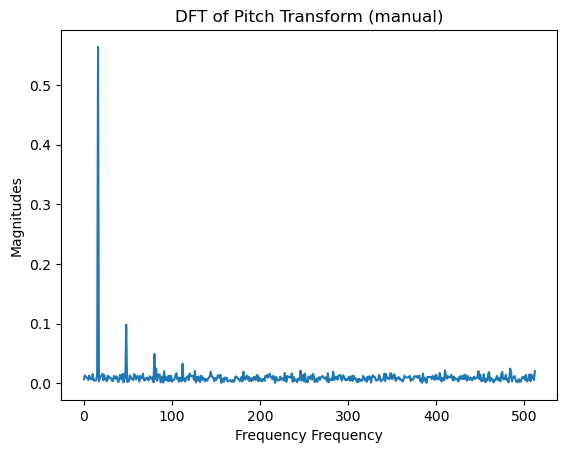

In [26]:
from time import time 

def dft(y):
    N = len(y)
    c = np.zeros(N//2+1, complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)
    return c


t1 = time()

pitch_transform = dft(pitch)           #fourier coefficients gamma_k * N = c_k    ->    gamma_k = c_k / N

t2 = time()

print('time to compute = ', t2 - t1)
freq_axis = np.arange(0, N//2+1)
plt.plot(freq_axis, np.abs(pitch_transform)/N)
plt.ylabel('Magnitudes')
plt.xlabel('Frequency Frequency')
plt.title('DFT of Pitch Transform (manual)')
plt.show()




## FFT Example: De-Noising a Signal

### Exercise 5

Repeat Exercise 4, but using numpy.fft.rfft instead of the dft code snippet from the textbook. Which algorithm is faster, and by how much? How close are the transform results?

0.00034999847412109375
faster by about 1.6430449485778809


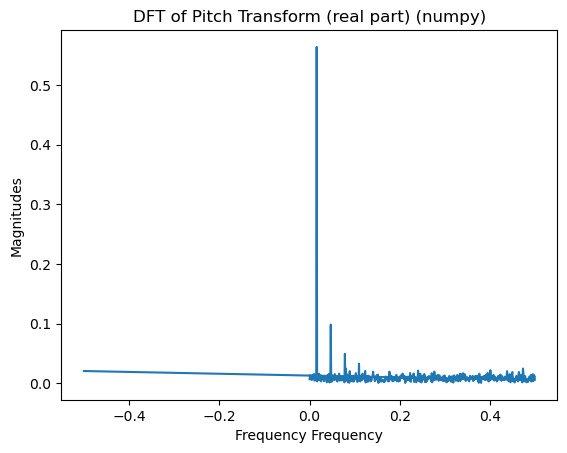

In [84]:
t1= time()
numpy_ft = np.fft.rfft(pitch)
axis = np.fft.fftfreq(N)[0:len(numpy_ft)]   #only the real part
t2 = time()


print(t2-t1)
print('faster by about', 1.643394947052002 - t2 + t1)

f_coefficients = numpy_ft/N

plt.plot(axis, np.abs(f_coefficients))
plt.ylabel('Magnitudes')
plt.xlabel('Frequency Frequency')
plt.title('DFT of Pitch Transform (real part) (numpy)')
plt.show()




### Exercise 6

We now seek to "de-noise" the signal. We will treat the three highest-amplitude frequencies as our "signal" which we want to isolate, and everything else as the "noise" which we want to eliminate. 

Convert the Fourier coefficients to frequencies by dividing them by $T$ (the total length of the time interval covered by the time series.) Now you should have an array of frequencies and an array of corresponding amplitudes.

Sort the frequencies by amplitude (you can use numpy.argsort if you like). Print the three "signal" frequencies, and their corresponding amplitudes.

In [86]:
T = N*interval      #total length of time

f_frequencies = f_coefficients/T    #array of frequencies
sorted_freq = (np.argsort(np.abs(f_frequencies)))[::-1]    #returns maximum amplitude values index decreasing to minimum

i1 = sorted_freq[0]
i2 = sorted_freq[1]
i3 = sorted_freq[2]

f1 = axis[i1]
f2 = axis[i2]
f3 = axis[i3]

a1 = np.abs(f_frequencies[i1])
a2 = np.abs(f_frequencies[i2])
a3 = np.abs(f_frequencies[i3])

print('signal frequencies:', f1, f2, f3)
print('abs amplitude values:', a1, a2, a3)





signal frequencies: 0.015625 0.046875 0.078125
abs amplitude values: 24.293923868570893 4.225070782516156 2.1129277669378688


### Exercise 7

Now we will isolate the "noise".

Create a copy of the array of amplitudes (use numpy.copy). In the copy, zero out the largest three amplitudes (which you identified in the previous exercise). Inverse-transform the result, using np.fft.irfft, to get an array of pitch values. Plot it vs time.

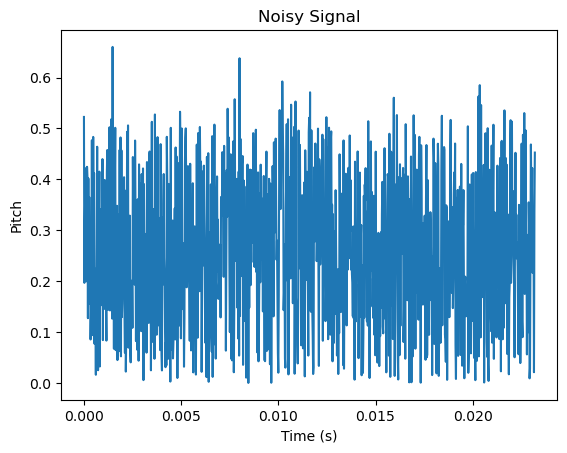

In [91]:
amp_copy = np.copy(f_frequencies)*N*T
indexes = (i1, i2, i3)
for k in range(len(amp_copy)):
    if k in indexes:
        amp_copy[k] = 0
    # else:
    #     amp_copy[k] = np.abs(f_frequencies[k])            #I don't know why we couldnt have just done it this way ... 

# print(amp_copy)

noisy = np.fft.irfft(amp_copy)
plt.plot(ptime, np.abs(noisy))
plt.ylabel('Pitch')
plt.xlabel('Time (s)')
plt.title('Noisy Signal')
plt.show()


### Exercise 8

Finally, let's plot the signal, i.e. the data with the noise subtracted out. Subtract your Exercise 7 array of pitch values from your original (Exercise 3) array of pitch values. Plot the result vs time.

Does the plot look a lot different from the results of Exercise 3?

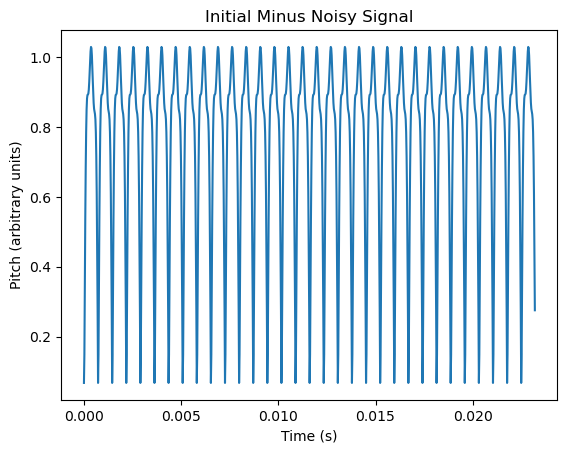

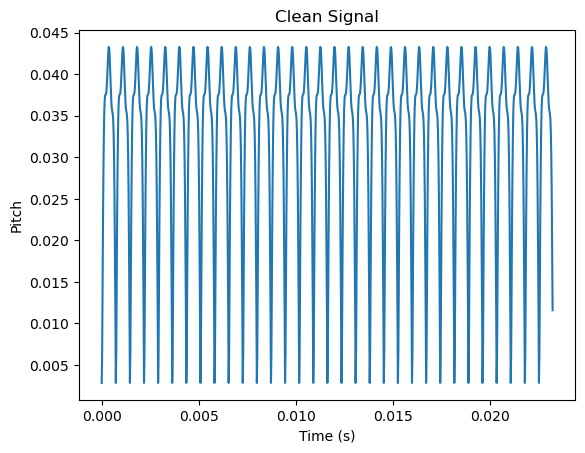

In [96]:
plt.plot(ptime, np.abs(pitch - noisy))
plt.xlabel('Time (s)')
plt.ylabel('Pitch (arbitrary units)')
plt.title('Initial Minus Noisy Signal')
plt.show()

#yes it looks alot different, is a lot cleaner. Can accomplish same thing via isolating magnitudes are transforming
#you get the same thing

amp_copy = np.copy(f_frequencies)*N*T
indexes = (i1, i2, i3)
for k in range(len(amp_copy)):
    if k in indexes:
        amp_copy[k] = f_frequencies[k] 
    else:
        amp_copy[k] = 0          


clean = np.fft.irfft(amp_copy)
plt.plot(ptime, np.abs(clean))
plt.ylabel('Pitch')
plt.xlabel('Time (s)')
plt.title('Clean Signal')
plt.show()